# Random forests on embeddings

This script reads all embedding csvs in the folder_path, computes random forests. 

Fix
- These have a random 0.8:0.2 training split, this is currently not the same random split as the fullt rained resnets, so fix this.
- With both cases, could maybe do a more comprehensive sweep of the random splits, e.g 5 fold cross-val to get error bars

In [1]:
import os
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from datetime import datetime

In [2]:
# Path to the folder containing the CSV files
folder_path = '/home/ben/reef-audio-representation-learning/code/simclr-pytorch-reefs/evaluation/embeddings/raw_embeddings'

In [3]:
# Function to calculate metrics
def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return accuracy, precision, recall, f1

# Initialize an empty DataFrame to store metrics
columns = ['Filename', 'Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1',
           'Train Accuracy', 'Train Precision', 'Train Recall', 'Train F1']
results_df = pd.DataFrame(columns=columns)

# Path to the folder containing the CSV files
folder_path = '/home/ben/reef-audio-representation-learning/code/simclr-pytorch-reefs/evaluation/embeddings/raw_embeddings'

# Loop through each file in the folder
for filename in os.listdir(folder_path):
    # Check if the file is a CSV file
    if filename.endswith('.csv'):
        # Full path to the file
        filepath = os.path.join(folder_path, filename)
        
        # Read the CSV file into a DataFrame
        df = pd.read_csv(filepath)
        
        # Extract features and labels
        X = df.drop(columns=['Label'])
        y = df['Label']
        
        # Split the data into training and testing sets (80:20 ratio)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
        
        # Initialize and train the Random Forest Classifier
        clf = RandomForestClassifier(random_state=0)
        clf.fit(X_train, y_train)
        
        # Make predictions on test set
        y_pred_test = clf.predict(X_test)
        # Make predictions on training set
        y_pred_train = clf.predict(X_train)
        
        # Calculate metrics for test set
        accuracy_test, precision_test, recall_test, f1_test = calculate_metrics(y_test, y_pred_test)
        # Calculate metrics for training set
        accuracy_train, precision_train, recall_train, f1_train = calculate_metrics(y_train, y_pred_train)
        
        # Create a DataFrame for the new row and concatenate it to the existing DataFrame
        new_row_df = pd.DataFrame({
            'Filename': [filename],
            'Test Accuracy': [accuracy_test],
            'Test Precision': [precision_test],
            'Test Recall': [recall_test],
            'Test F1': [f1_test],
            'Train Accuracy': [accuracy_train],
            'Train Precision': [precision_train],
            'Train Recall': [recall_train],
            'Train F1': [f1_train]
        })
        results_df = pd.concat([results_df, new_row_df], ignore_index=True)
        
        # Print metrics
        print(f"Results for {filename}:")
        print("--- Test Metrics ---")
        print(f"Accuracy: {accuracy_test}")
        print(f"Precision: {precision_test}")
        print(f"Recall: {recall_test}")
        print(f"F1 Score: {f1_test}")
        print("--- Training Metrics ---")
        print(f"Accuracy: {accuracy_train}")
        print(f"Precision: {precision_train}")
        print(f"Recall: {recall_train}")
        print(f"F1 Score: {f1_train}")
        print("-" * 40)

Results for ImageNet-kenya-embeddings.csv:
--- Test Metrics ---
Accuracy: 0.7647058823529411
Precision: 0.8235294117647058
Recall: 0.7647058823529411
F1 Score: 0.7030812324929973
--- Training Metrics ---
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
----------------------------------------
Results for ImageNet-australia-embeddings.csv:
--- Test Metrics ---
Accuracy: 0.7433333333333333
Precision: 0.743864415838938
Recall: 0.7433333333333333
F1 Score: 0.7431935164700781
--- Training Metrics ---
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
----------------------------------------
Results for ImageNet-florida-embeddings.csv:
--- Test Metrics ---
Accuracy: 0.9158415841584159
Precision: 0.9150126322977125
Recall: 0.9158415841584159
F1 Score: 0.9150428940236284
--- Training Metrics ---
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
----------------------------------------
Results for ImageNet-french_polynesia-embeddings.csv:
--- Test Metrics ---
Accuracy: 0.96881959

### Make the df more readable

In [4]:
# Create the new columns 'Embedding' and 'Country' by splitting the 'Filename' column
results_df['Embedding'] = results_df['Filename'].apply(lambda x: x.split('-')[0])
results_df['Location'] = results_df['Filename'].apply(lambda x: x.split('-')[1])

# Drop the original 'Filename' column
results_df.drop(columns=['Filename'], inplace=True)

# Reorder the columns to have 'Embedding' and 'Country' at the beginning
#column_order = ['Embedding', 'Location'] + [col for col in results_df.columns if col not in ['Embedding', 'Location']]
#results_df = results_df[column_order]

# Specify the desired order for the 'Embedding' column
ordered_categories = ['ReefCLR', 'ImageNet', 'VGGish']

# Convert the 'Embedding' column to a categorical type with the specified order
results_df['Embedding'] = pd.Categorical(results_df['Embedding'], categories=ordered_categories, ordered=True)

# Sort the DataFrame by the 'Country' and then by 'Embedding' columns
results_df = results_df.sort_values(by=['Location', 'Embedding'])

# Display the updated DataFrame
results_df


,Test Accuracy,Test Precision,Test Recall,Test F1,Train Accuracy,Train Precision,Train Recall,Train F1,Embedding,Location
14,0.654167,0.654693,0.654167,0.653872,1.000000,1.000000,1.000000,1.000000,ReefCLR,australia
1,0.743333,0.743864,0.743333,0.743194,1.000000,1.000000,1.000000,1.000000,ImageNet,australia
6,0.800000,0.800334,0.800000,0.799944,1.000000,1.000000,1.000000,1.000000,VGGish,australia
13,0.585227,0.550704,0.585227,0.565166,0.958778,0.957339,0.958778,0.957557,ReefCLR,bermuda
5,0.525568,0.475927,0.525568,0.485934,0.965885,0.965219,0.965885,0.965173,ImageNet,bermuda
7,0.661932,0.641133,0.661932,0.634280,0.953802,0.952931,0.953802,0.953206,VGGish,bermuda
12,0.918812,0.918458,0.918812,0.917362,1.000000,1.000000,1.000000,1.000000,ReefCLR,florida
2,0.915842,0.915013,0.915842,0.915043,1.000000,1.000000,1.000000,1.000000,ImageNet,florida
8,0.958416,0.958293,0.958416,0.958337,1.000000,1.000000,1.000000,1.000000,VGGish,florida
11,0.956570,0.956580,0.956570,0.956570,1.000000,1.000000,1.000000,1.000000,ReefCLR,french_polynesia


In [5]:
# Generate a timestamp
current_time = datetime.now().strftime("%Y%m%d_%H%M%S")

# Save the DataFrame to a CSV file with a timestamp in the filename
results_df.to_csv(f"Results/RF_results-{current_time}.csv", index=False)

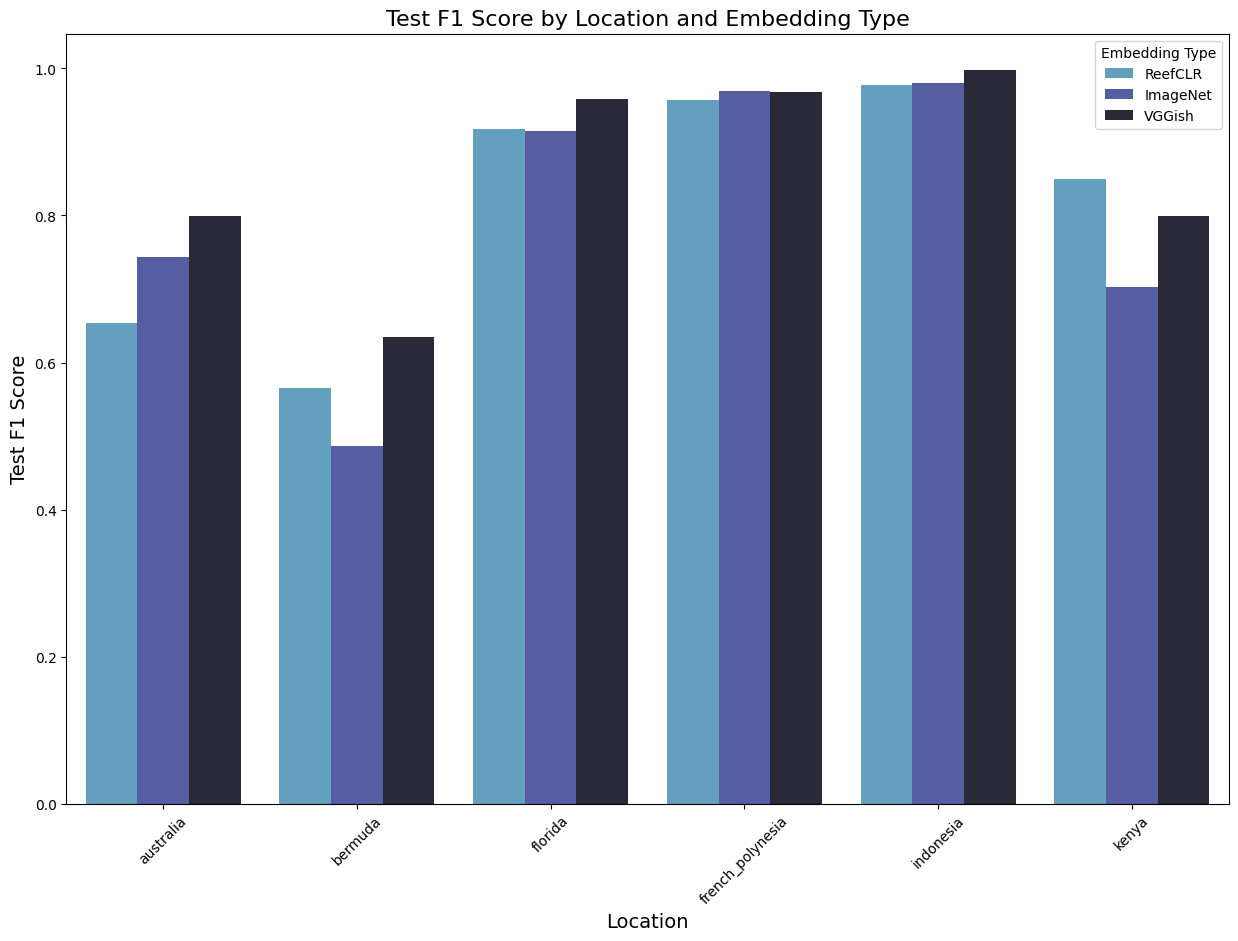

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a nice color palette for the plot
sns.set_palette("icefire")

# Create the bar plot
plt.figure(figsize=(15, 10))
sns.barplot(data=results_df, x='Location', y='Test F1', hue='Embedding')

# Add labels and title
plt.xlabel('Location', fontsize=14)
plt.ylabel('Test F1 Score', fontsize=14)
plt.title('Test F1 Score by Location and Embedding Type', fontsize=16)
plt.xticks(rotation=45)
plt.legend(title='Embedding Type')

# Show the plot
plt.show()
